In [1]:
 # colab matplotlib Korean font / colab에서 matplotlib으로 그래프를 그릴 때 한글폰트를 사용하기 위한 처리
 # after run code, restart runtime / 아래 코드를 실행 후 런타임 다시 시작

 !sudo apt-get install -y fonts-nanum
 !sudo fc-cache -fv
 !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (46.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
# setting Korean font at matplolib
import matplotlib.pyplot as plt

plt.rc('font',family="NanumBarunGothic") # 맑은 고딕으로 폰트 설정
plt.rc('axes', unicode_minus=False) # minus error correction 마이너스 (-) 깨짐 방지


데이터 retrive source

---
[인구밀도 주택총조사](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B08024&vw_cd=MT_ZTITLE&list_id=A1_13&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=MT_ZTITLE&path=%252FstatisticsList%252FstatisticsListIndex.do)




In [ ]:
# '인구밀도_인구주택총조사기준__20221007100654.csv' 파일 -> 세션 저장소에 업로드 

In [3]:
# making dataframe
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('인구밀도_인구주택총조사기준__20221007100654.csv', encoding='cp949') # utf-8, euc-kr
df

,행정구역별,2019,2020,2021
0,전국,515.7,516.2,515.2
1,서울특별시,15926.9,15839.0,15650.1
2,부산광역시,4379.7,4348.9,4316.4
3,대구광역시,2750.3,2728.6,2702.2
4,인천광역시,2776.6,2765.1,2772.8
5,광주광역시,2972.7,2948.5,2944.0
6,대전광역시,2777.5,2758.1,2742.8
7,울산광역시,1076.9,1069.0,1055.0
8,세종특별자치시,727.3,761.3,787.7
9,경기도,1305.0,1325.3,1338.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역별   18 non-null     object 
 1   2019    18 non-null     float64
 2   2020    18 non-null     float64
 3   2021    18 non-null     float64
dtypes: float64(3), object(1)
memory usage: 704.0+ bytes


In [6]:
df.columns

Index(['행정구역별', '2019', '2020', '2021'], dtype='object')

In [7]:
df.rename(columns = {'행정구역별':'행정구역'}, inplace=True)
df

,행정구역,2019,2020,2021
0,전국,515.7,516.2,515.2
1,서울특별시,15926.9,15839.0,15650.1
2,부산광역시,4379.7,4348.9,4316.4
3,대구광역시,2750.3,2728.6,2702.2
4,인천광역시,2776.6,2765.1,2772.8
5,광주광역시,2972.7,2948.5,2944.0
6,대전광역시,2777.5,2758.1,2742.8
7,울산광역시,1076.9,1069.0,1055.0
8,세종특별자치시,727.3,761.3,787.7
9,경기도,1305.0,1325.3,1338.9


In [8]:
# 0번째 행 삭제하기
df.drop(index=0, inplace=True)
df.head()

,행정구역,2019,2020,2021
1,서울특별시,15926.9,15839.0,15650.1
2,부산광역시,4379.7,4348.9,4316.4
3,대구광역시,2750.3,2728.6,2702.2
4,인천광역시,2776.6,2765.1,2772.8
5,광주광역시,2972.7,2948.5,2944.0


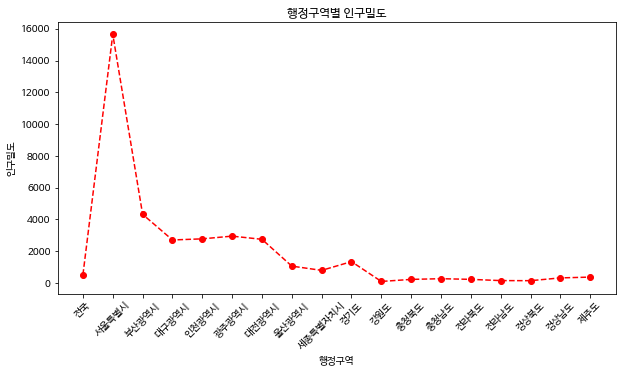

In [ ]:
# 2021년 인구밀도 데이터로 선그래프 그리기
plt.figure(figsize=(10,5))

x=df.행정구역
y=df['2021']   # y=df[2021]로 처리하면 오류, 숫자 아닌 문자로 인식할 수 있게 주의 

plt.plot(x,y, 'r--o')
plt.title('행정구역별 인구밀도')
plt.xlabel('행정구역')
plt.ylabel('인구밀도')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df

,행정구역,2019,2020,2021
0,전국,515.7,516.2,515.2
1,서울특별시,15926.9,15839.0,15650.1
2,부산광역시,4379.7,4348.9,4316.4
3,대구광역시,2750.3,2728.6,2702.2
4,인천광역시,2776.6,2765.1,2772.8
5,광주광역시,2972.7,2948.5,2944.0
6,대전광역시,2777.5,2758.1,2742.8
7,울산광역시,1076.9,1069.0,1055.0
8,세종특별자치시,727.3,761.3,787.7
9,경기도,1305.0,1325.3,1338.9


In [ ]:
# 강원도에서 제주도까지 데이터만 남기고 삭제하기 
for i in range(1,10):
  df.drop(index=i, inplace=True)

df

,행정구역,2019,2020,2021
0,전국,515.7,516.2,515.2
10,강원도,90.3,90.4,90.4
11,충청북도,220.0,220.3,219.4
12,충청남도,265.4,264.0,263.8
13,전라북도,224.0,223.4,221.4
14,전라남도,144.8,144.9,143.9
15,경상북도,140.2,138.9,138.4
16,경상남도,317.6,316.2,313.6
17,제주도,359.4,362.6,363.8


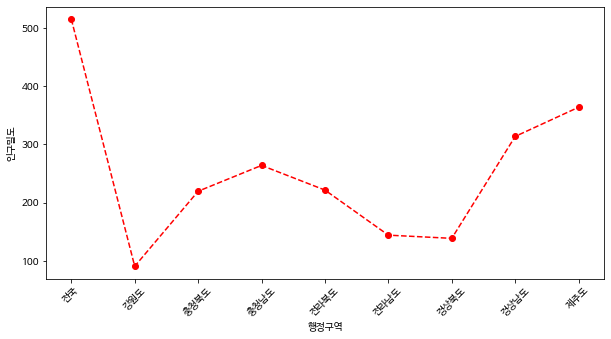

In [ ]:
plt.figure(figsize=(10,5))

x=df.행정구역
y=df['2021']  # y=df.'2021' 는 오류  --> SyntaxError: invalid syntax

plt.plot(x,y,'r--o')
plt.xlabel('행정구역')
plt.ylabel('인구밀도')
plt.xticks(rotation=45)
plt.show()

막대그래프 그리기
* 세로막대 그래프 plt.bar(x,y)
* 가로막대 그래프 plt.barh(x,y)

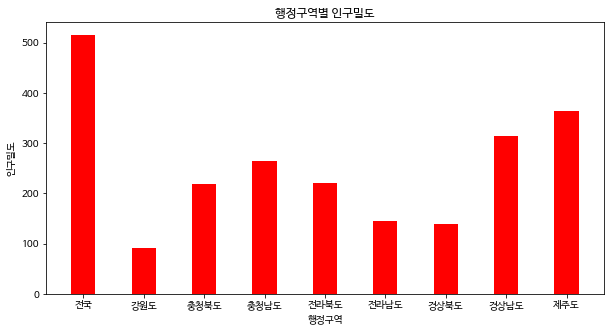

In [ ]:
plt.figure(figsize=(10,5))

x=df.행정구역
y=df['2021']

plt.bar(x,y, width = 0.4, color='r')
plt.title('행정구역별 인구밀도')
plt.xlabel('행정구역')
plt.ylabel('인구밀도')
plt.show()


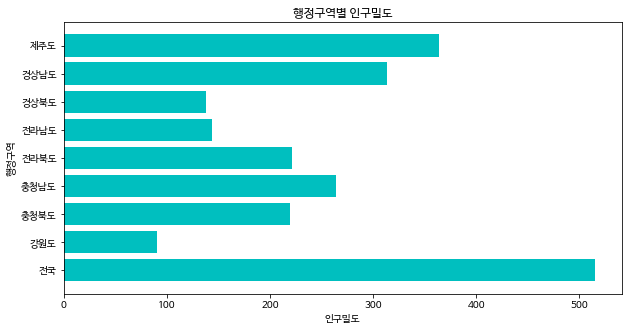

In [ ]:
# 가로막대 그래프
plt.figure(figsize=(10,5))

x=df.행정구역
y=df['2021']

plt.barh(x,y,color='c')
plt.title('행정구역별 인구밀도')
plt.ylabel('행정구역')
plt.xlabel('인구밀도')
plt.show()

주민등록인구 및 세대현황 데이터 다운로드, 시각화
* 행정안전부 - 주민등록 인구 및 세대현황
* https://jumin.mois.go.kr/#

In [ ]:
# 데이터프레임 만들기
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('202209_202209_주민등록인구및세대현황_월간.csv', encoding='cp949') # utf-8, eur-kr 
df

,행정구역,2022년09월_총인구수,2022년09월_세대수,2022년09월_세대당 인구,2022년09월_남자 인구수,2022년09월_여자 인구수,2022년09월_남여 비율
0,서울특별시 (1100000000),"9,450,768","4,450,525",2.12,"4,582,361","4,868,407",0.94
1,서울특별시 종로구 (1111000000),"141,978","72,797",1.95,"68,652","73,326",0.94
2,서울특별시 중구 (1114000000),"120,969","63,300",1.91,"58,812","62,157",0.95
3,서울특별시 용산구 (1117000000),"219,275","109,954",1.99,"105,385","113,890",0.93
4,서울특별시 성동구 (1120000000),"282,250","133,819",2.11,"137,351","144,899",0.95
5,서울특별시 광진구 (1121500000),"338,257","169,338",2.00,"163,038","175,219",0.93
6,서울특별시 동대문구 (1123000000),"337,106","170,068",1.98,"166,051","171,055",0.97
7,서울특별시 중랑구 (1126000000),"386,390","187,513",2.06,"190,115","196,275",0.97
8,서울특별시 성북구 (1129000000),"431,827","197,588",2.19,"207,715","224,112",0.93
9,서울특별시 강북구 (1130500000),"294,876","144,577",2.04,"143,219","151,657",0.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   행정구역             26 non-null     object 
 1   2022년09월_총인구수    26 non-null     object 
 2   2022년09월_세대수     26 non-null     object 
 3   2022년09월_세대당 인구  26 non-null     float64
 4   2022년09월_남자 인구수  26 non-null     object 
 5   2022년09월_여자 인구수  26 non-null     object 
 6   2022년09월_남여 비율   26 non-null     float64
dtypes: float64(2), object(5)
memory usage: 1.5+ KB


In [ ]:
df.describe()

,2022년09월_세대당 인구,2022년09월_남여 비율
count,26.000000,26.000000
mean,2.111538,0.943846
std,0.168016,0.030473
min,1.720000,0.880000
25%,1.992500,0.930000
50%,2.090000,0.940000
75%,2.242500,0.960000
max,2.440000,1.020000


In [ ]:
df.head()

,행정구역,2022년09월_총인구수,2022년09월_세대수,2022년09월_세대당 인구,2022년09월_남자 인구수,2022년09월_여자 인구수,2022년09월_남여 비율
0,서울특별시 (1100000000),"9,450,768","4,450,525",2.12,"4,582,361","4,868,407",0.94
1,서울특별시 종로구 (1111000000),"141,978","72,797",1.95,"68,652","73,326",0.94
2,서울특별시 중구 (1114000000),"120,969","63,300",1.91,"58,812","62,157",0.95
3,서울특별시 용산구 (1117000000),"219,275","109,954",1.99,"105,385","113,890",0.93
4,서울특별시 성동구 (1120000000),"282,250","133,819",2.11,"137,351","144,899",0.95


In [ ]:
# 컬럼명 변경하기
df.columns

Index(['행정구역', '2022년09월_총인구수', '2022년09월_세대수', '2022년09월_세대당 인구',
       '2022년09월_남자 인구수', '2022년09월_여자 인구수', '2022년09월_남여 비율'],
      dtype='object')

In [ ]:
df.columns=['행정구역', '총인구수', '세대수', '세대당 인구', '남자 인구수', '여자 인구수', '남여 비율']
df.head()

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 (1100000000),"9,450,768","4,450,525",2.12,"4,582,361","4,868,407",0.94
1,서울특별시 종로구 (1111000000),"141,978","72,797",1.95,"68,652","73,326",0.94
2,서울특별시 중구 (1114000000),"120,969","63,300",1.91,"58,812","62,157",0.95
3,서울특별시 용산구 (1117000000),"219,275","109,954",1.99,"105,385","113,890",0.93
4,서울특별시 성동구 (1120000000),"282,250","133,819",2.11,"137,351","144,899",0.95


In [ ]:
# 0번째 행 삭제
df.drop(0, inplace=True)
df.head(3)

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1,서울특별시 종로구 (1111000000),"141,978","72,797",1.95,"68,652","73,326",0.94
2,서울특별시 중구 (1114000000),"120,969","63,300",1.91,"58,812","62,157",0.95
3,서울특별시 용산구 (1117000000),"219,275","109,954",1.99,"105,385","113,890",0.93


In [ ]:
# 행정구역을 구이름으로 변경하기
df.행정구역 = df.행정구역.str.split(' ').str[1]
df

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1,종로구,"141,978","72,797",1.95,"68,652","73,326",0.94
2,중구,"120,969","63,300",1.91,"58,812","62,157",0.95
3,용산구,"219,275","109,954",1.99,"105,385","113,890",0.93
4,성동구,"282,250","133,819",2.11,"137,351","144,899",0.95
5,광진구,"338,257","169,338",2.00,"163,038","175,219",0.93
6,동대문구,"337,106","170,068",1.98,"166,051","171,055",0.97
7,중랑구,"386,390","187,513",2.06,"190,115","196,275",0.97
8,성북구,"431,827","197,588",2.19,"207,715","224,112",0.93
9,강북구,"294,876","144,577",2.04,"143,219","151,657",0.94
10,도봉구,"312,788","138,541",2.26,"152,019","160,769",0.95


In [ ]:
# 행정구역을 구이름으로 변경하기
df.행정구역 = df.행정구역.str.split('').str[1]  # split('')로 작업하는 것 vs. split(' ')로 작업하는 것의 차이에 주의 
df


,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1,서,"141,978","72,797",1.95,"68,652","73,326",0.94
2,서,"120,969","63,300",1.91,"58,812","62,157",0.95
3,서,"219,275","109,954",1.99,"105,385","113,890",0.93
4,서,"282,250","133,819",2.11,"137,351","144,899",0.95
5,서,"338,257","169,338",2.00,"163,038","175,219",0.93
6,서,"337,106","170,068",1.98,"166,051","171,055",0.97
7,서,"386,390","187,513",2.06,"190,115","196,275",0.97
8,서,"431,827","197,588",2.19,"207,715","224,112",0.93
9,서,"294,876","144,577",2.04,"143,219","151,657",0.94
10,서,"312,788","138,541",2.26,"152,019","160,769",0.95


In [ ]:
# object type을 int type으로 변경
df.총인구수 = df.총인구수.str.replace(',', '').astype(int)
df.head()

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1,종로구,141978,"72,797",1.95,"68,652","73,326",0.94
2,중구,120969,"63,300",1.91,"58,812","62,157",0.95
3,용산구,219275,"109,954",1.99,"105,385","113,890",0.93
4,성동구,282250,"133,819",2.11,"137,351","144,899",0.95
5,광진구,338257,"169,338",2.00,"163,038","175,219",0.93


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 25
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역    25 non-null     object 
 1   총인구수    25 non-null     int64  
 2   세대수     25 non-null     object 
 3   세대당 인구  25 non-null     float64
 4   남자 인구수  25 non-null     object 
 5   여자 인구수  25 non-null     object 
 6   남여 비율   25 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.6+ KB


In [ ]:
# 세대수, 남자 인구수, 여자 인구수를 숫자형으로 변환하기
df.세대수 = df.세대수.str.replace(',', '').astype(int)
df['남자 인구수']=df['남자 인구수'].str.replace(',','').astype(int)
df['여자 인구수']=df['여자 인구수'].str.replace(',','').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 25
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역    25 non-null     object 
 1   총인구수    25 non-null     int64  
 2   세대수     25 non-null     int64  
 3   세대당 인구  25 non-null     float64
 4   남자 인구수  25 non-null     int64  
 5   여자 인구수  25 non-null     int64  
 6   남여 비율   25 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 1.6+ KB


In [ ]:
df.head()

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1,종로구,141978,72797,1.95,68652,73326,0.94
2,중구,120969,63300,1.91,58812,62157,0.95
3,용산구,219275,109954,1.99,105385,113890,0.93
4,성동구,282250,133819,2.11,137351,144899,0.95
5,광진구,338257,169338,2.00,163038,175219,0.93


In [ ]:
df.describe()

,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,378030.720000,178021.000000,2.111200,183294.440000,194736.280000,0.944000
std,127323.510154,56715.951772,0.171472,61324.011347,66145.499428,0.031091
min,120969.000000,63300.000000,1.720000,58812.000000,62157.000000,0.880000
25%,305149.000000,144577.000000,1.990000,145374.000000,159775.000000,0.930000
50%,383637.000000,181353.000000,2.080000,185490.000000,196275.000000,0.940000
75%,460617.000000,202325.000000,2.260000,224424.000000,235085.000000,0.960000
max,660211.000000,285175.000000,2.440000,317972.000000,342239.000000,1.020000


In [ ]:
df.head(3)

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1,종로구,141978,72797,1.95,68652,73326,0.94
2,중구,120969,63300,1.91,58812,62157,0.95
3,용산구,219275,109954,1.99,105385,113890,0.93


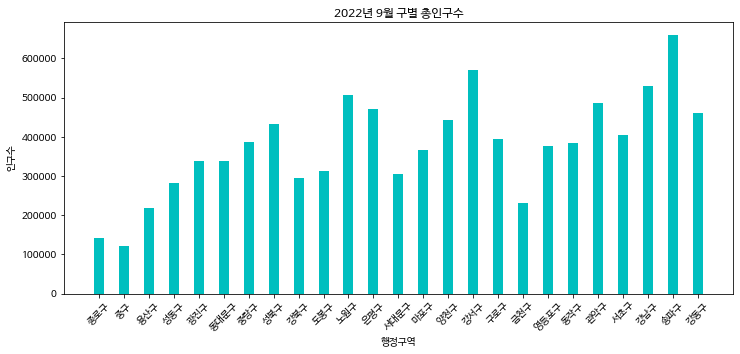

In [ ]:
# 행정구역별 총인구수 그래프 그리기 (막대 그래프)
plt.figure(figsize=(12,5))

x=df.행정구역
y=df.총인구수

plt.bar(x,y, width=0.4, color='c')
plt.title('2022년 9월 구별 총인구수')
plt.xlabel('행정구역')
plt.ylabel('인구수')
plt.xticks(rotation=45)
plt.show()

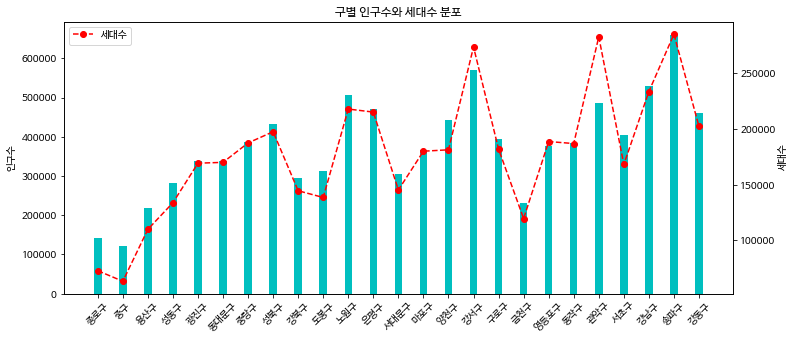

In [ ]:
# 세대수를 선그래프로 함께 나타내기
x=df.행정구역
y1=df.총인구수
y2=df.세대수

fig, ax1=plt.subplots(figsize=(12,5))

ax1.bar(x,y1,width=0.3, color='c', label='인구수')
ax2 = ax1.twinx() # ax1과 x축을 공유하는 새로운 axes 객체를 만든다
ax2.plot(x, y2, color='r', linestyle='--', marker='o', label='세대수')

ax1.set_title('구별 인구수와 세대수 분포')
ax1.set_ylabel('인구수')
ax2.set_ylabel('세대수')
ax1.tick_params(axis='x', labelrotation = 45)
plt.legend()
plt.show()


In [ ]:
fin